# Financial Data Credit Analysis
Data exploration and visualization for a financial business.

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans as km

import os

In [11]:
# Reading data 
current_route = os.getcwd()
route_data = os.path.join(
    current_route, "cc_data_samples.csv")
data = pd.read_csv(route_data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# celaning from nulls
data = data.dropna()
data.shape

(8636, 18)

In [27]:
# checking for duplicates
print(data.duplicated().value_counts())

False    8636
Name: count, dtype: int64


In [17]:
# ignore cust_id column
d_r = data.drop(columns='CUST_ID', axis=1)
d_r.shape

(8636, 17)

In [22]:
# Defining lists - cost and n_cluster in order to create elbow plot
cost = []
n_cluster = []

# using a for loop to make 9 models with different k values and store cost.
for k in range(1, 10):
    kmeans_model = km(n_clusters=k, random_state=2)
    kmeans_model.fit(d_r)

    labels = kmeans_model.labels_

    inertia = kmeans_model.inertia_
    print("k = ", k, "cost =", inertia)
    cost.append(inertia)
    n_cluster.append(k)

k =  1 cost = 386445462723.71405
k =  2 cost = 274953743213.56934
k =  3 cost = 229270512522.41922
k =  4 cost = 203221622217.0563
k =  5 cost = 183388472613.95953
k =  6 cost = 159645947750.95984
k =  7 cost = 142094773461.99487
k =  8 cost = 131051816123.4193
k =  9 cost = 121669209977.80568


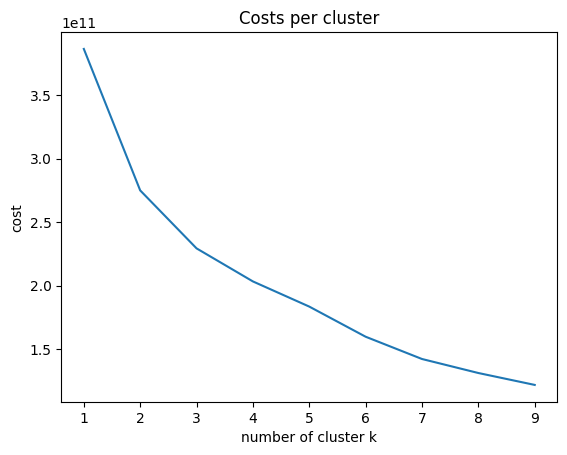

In [23]:
# Plotting elbow plot

plt.plot(n_cluster, cost)

plt.xlabel('number of cluster k')
plt.ylabel('cost')

plt.title('Costs per cluster')

plt.show()

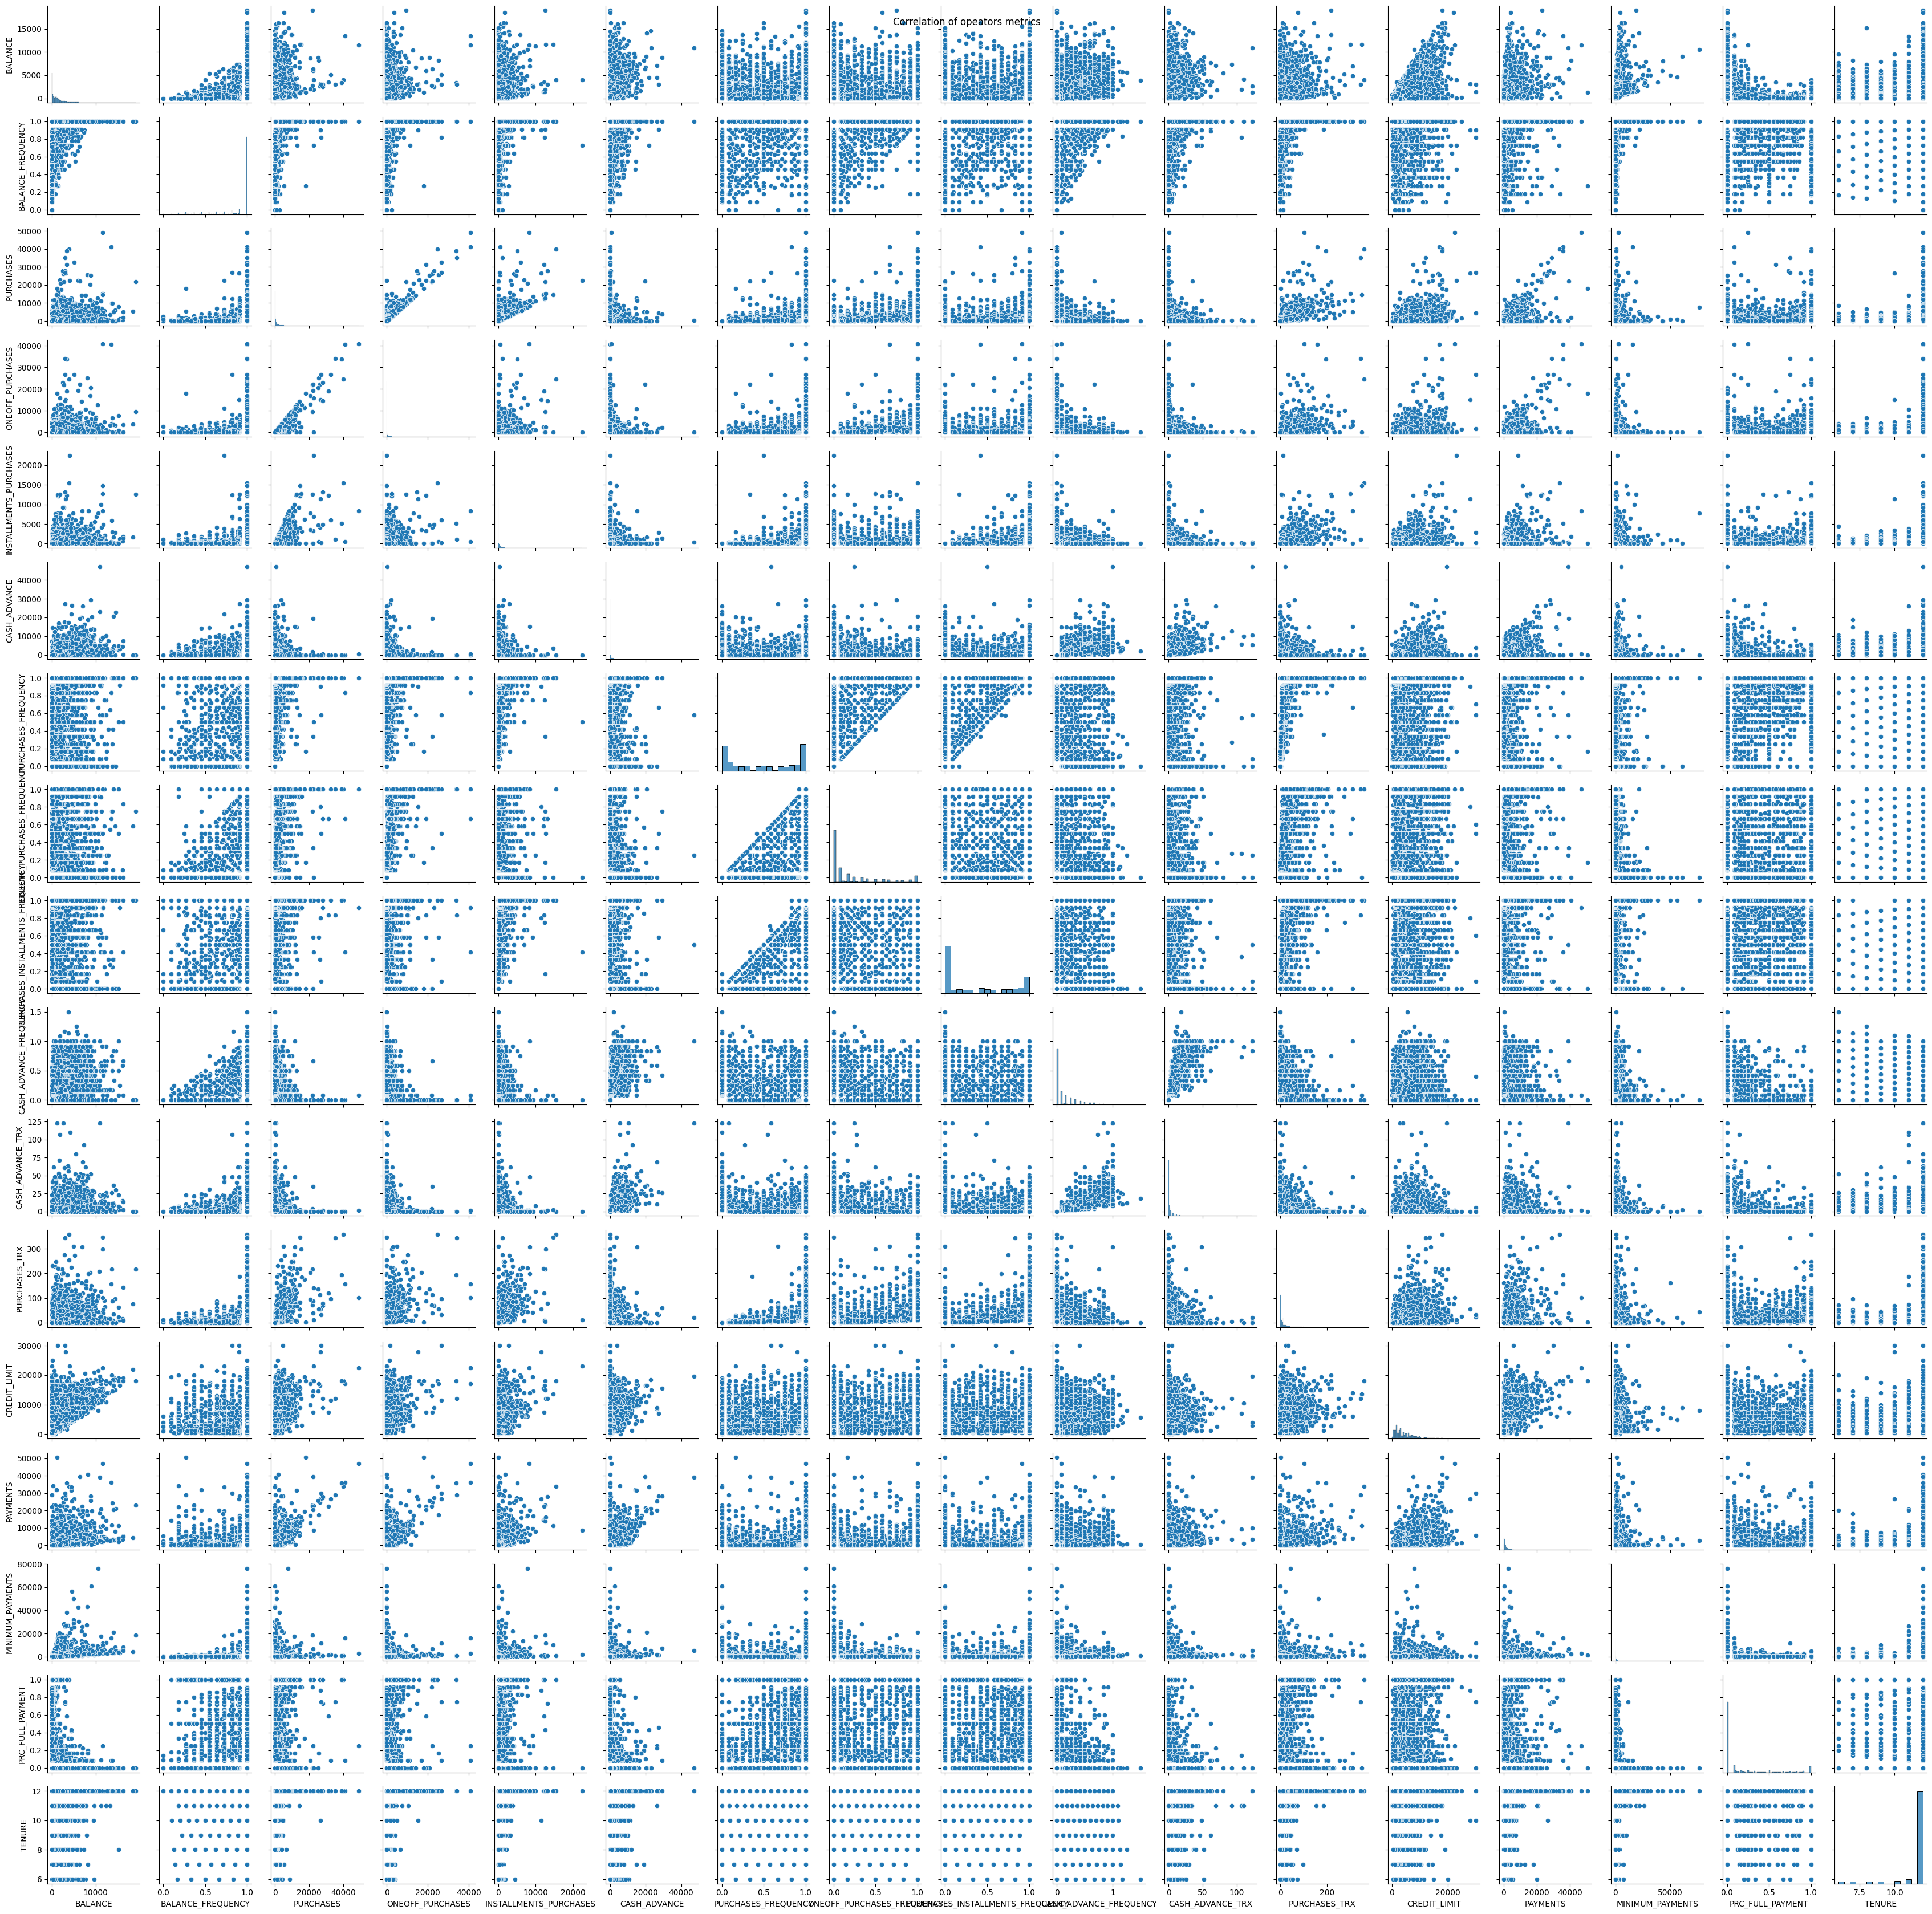

In [ ]:
# Check for correlation between columns
plot = sns.pairplot(d_r, height=2,
                    )
plt.tight_layout()
plt.show() 